This document shows the basic usage of qiskit. Note that there might be mistakes in it, as I myself am not too experienced with it. This is based on:
- https://qiskit.org/documentation/intro_tutorial1.html

This notebook requires you to have profoundly read and understood this article, as it handles the linear algebra behind it we won't explain in too much detail here:
https://quantum.country/qcvc



First, we need to import the needed qiskit functions.


In [2]:
import numpy as np #This is mostly used for mathematical operations
from qiskit import QuantumCircuit, transpile #used for the creation and compilation of the circuit
from qiskit.providers.aer import QasmSimulator #the simulator to locally test out circuits
from qiskit.visualization import plot_histogram #used to plot a histogram of the results

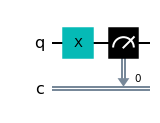

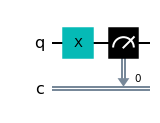

In [3]:
#Create a simulator
simulator = QasmSimulator()

#Create a simple circuit
circuit = QuantumCircuit(1,1)

#apply the X(NOT) gate on the first qubit
circuit.x(0)

#map the quantum measurment to a classical bit
circuit.measure(0,0)

#draw the circuit as ASCII
circuit.draw()

#draw the circuit as a "plot"
circuit.draw('mpl')


As you can see we have a simple circuit where we have one input, and one output with a X-Gate in the middle. Lets simulate it now!

In [4]:
def run_circuit_and_plot(compiled_circuit):
    # Execute the circuit on the qasm simulator
    job = simulator.run(compiled_circuit, shots=2000)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(circuit)
    plot_histogram(counts)

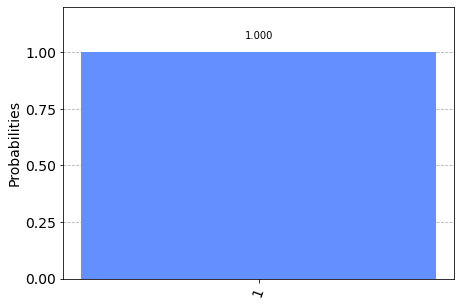

In [5]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

run_circuit_and_plot(compiled_circuit)

As we can see, just like in classical computing the X-Gate negates the input, which means if we set the input to |1>, we should get the opposing result.

As our input state is |0>, we have to add an _additional_ X-Gate to make the "input" a |1>

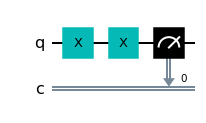

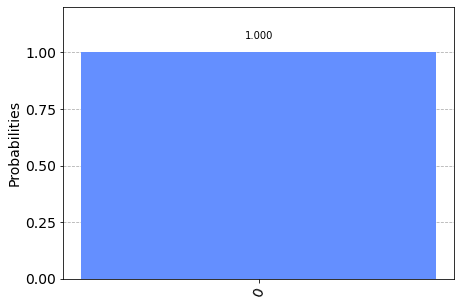

In [6]:
#create a new circuit, as applying an X-Gate to the already existing one would place it behind the measurment!
circuit = QuantumCircuit(1,1)


#apply the X(NOT) gate on the first qubit to make it a |1>
circuit.x(0)


#apply it again to find out the output of a negated |1>
circuit.x(0)

#map the quantum measurment to a classical bit
circuit.measure(0,0)

#draw the circuit as a "plot"
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)

As expected we not have a probability of 1 that the output is 0. This also means that 2 X Gates negate eachother, as they revert the work done by the previous gate.

Okay, now we want to try out different Gates on a single qubit. Let's continue with the Hadamard-Gate.

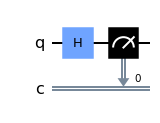

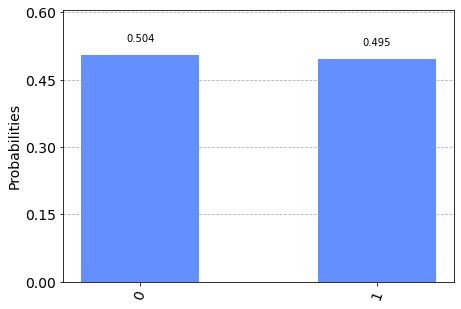

In [7]:

circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.measure(0,0)
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)


As we can see, we now have a mixed output. We can either get a _1_ or a _0_, which seems weird, but that's how things be in the quantum realm. This is also the reason why the y-axis of the plot is titled "Probabilities" - we have a given chance of having 1 or 0. 

After applying the H-Gate, our qubit is in a superposition of both state |0> and |1>. 
What if we reverse the input of the H-Gate?



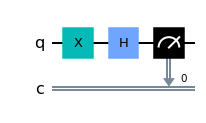

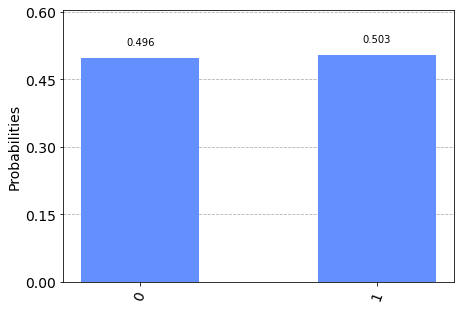

In [8]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.h(0)
circuit.measure(0,0)
circuit.draw()
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)

The histogram shows us that there isn't really a difference in the probabilities. (Of course, as you run it they will jump around, but should stay relatively close to a 50-50 split)

The X-Gate introduced before is one of the _Pauli_ gates. There are in total 3 Pauli gates:
_X, Y and Z_

They all fulfill a specific job:

X -> Bitflip

Y -> Basic transformation

Z -> Phaseflip

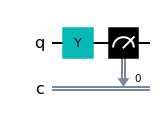

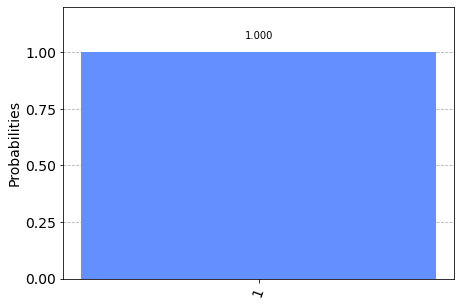

In [9]:
circuit = QuantumCircuit(1,1)
circuit.y(0)
circuit.measure(0,0)
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)

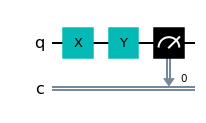

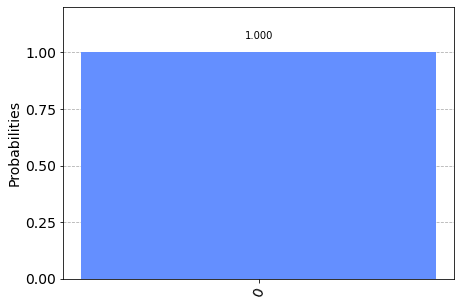

In [10]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.y(0)
circuit.measure(0,0)
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)

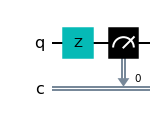

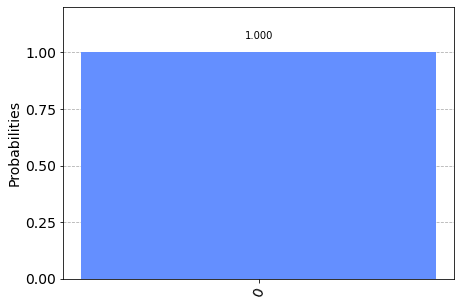

In [11]:
circuit = QuantumCircuit(1,1)
circuit.z(0)
circuit.measure(0,0)
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)

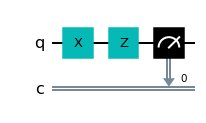

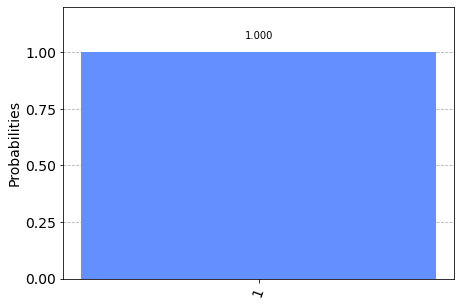

In [12]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.z(0)
circuit.measure(0,0)
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)

As we can see, they don't change the results at all - this is mostly because we don't take advantage of what they do, but this an be looked at later down the line.

There are more Gates, but those require us to dwell deeper into quantum circuitry that involves more than 1 qubit.

One gate that requires _2 qubits_ is the `controller not` gate. This one allows us to negate a certain qubit depending on the state of the other qubit.

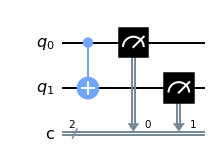

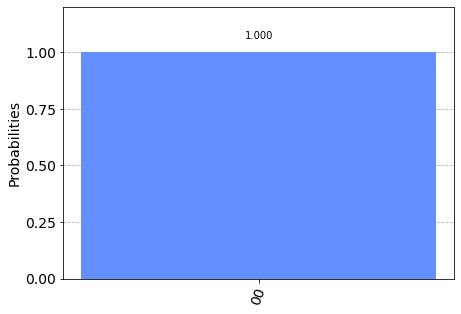

In [13]:
#2 qubits now!
circuit = QuantumCircuit(2,2)

#cx as in controlled x-gate
circuit.cx(0,1)

#we now measure an array, as we want to switch between both qubits for it!
circuit.measure([0,1],[0,1])
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)

As we can see, when both are 0, nothing really changes. Lets try out a mixture of any other input values!

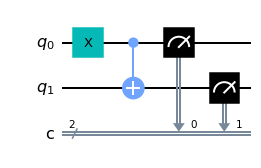

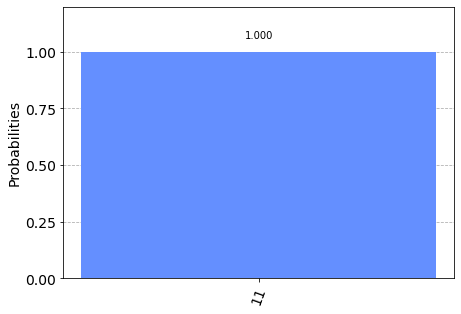

In [14]:
circuit = QuantumCircuit(2,2)
circuit.x(0)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)

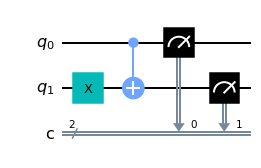

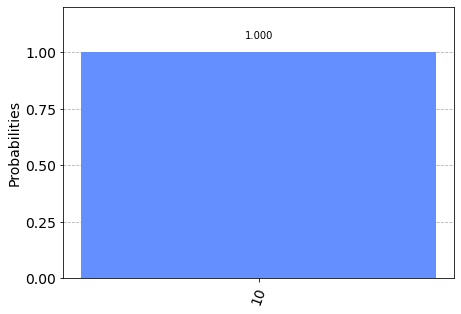

In [15]:
circuit = QuantumCircuit(2,2)
circuit.x(1)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)

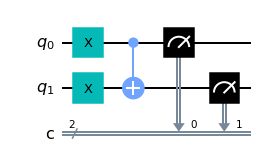

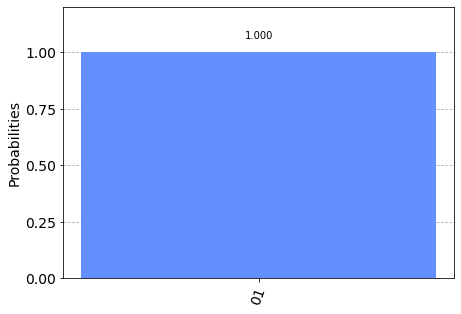

In [16]:
circuit = QuantumCircuit(2,2)
circuit.x(1)
circuit.x(0)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)

As you can see, something is wrong. When the input is `|11>`, our output is `|01>`, even tho we would expect `|10>`. This is because qiskit reverses the order, as stated here:

> The bit we flipped, which comes from qubit 7, lives on the far left of the string. This is because Qiskit numbers the bits in a string from right to left. Some prefer to number their bits the other way around, but Qiskit's system certainly has its advantages when we are using the bits to represent numbers. [...] So by flipping this bit, we’ve now written the number 128 in our simple 8-bit computer.

https://qiskit.org/textbook/ch-states/atoms-computation.html

Either way, it's behaving exactly as expected - when the controlling input is set to 1, the passing value gets flipped.


Now let's take a look at the _Toffoli-Gate_. It's basically a way of NANDing 2 qubits together using a third qubit as the output. In qiskit it's simply called `ccx`

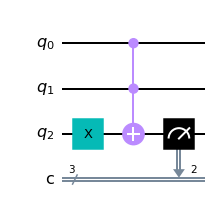

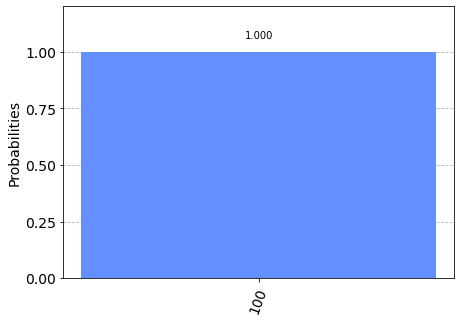

In [17]:
#Going for 3 qubits now 
circuit = QuantumCircuit(3,3)
#to have a real NAND we have to make sure the qubit being controlled is set to 1
circuit.x(2)

#applying the gate. Note that the first 2 inputs are the controlling bits!
circuit.ccx(0,1,2)

#Measurment is special in this case. Measuring all 3 qubits blindly would just return 000, so we have to watch out!
#getting the XOR value
circuit.measure(2,2)
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)

Nothing to be surprised by here, right? Lets try the other variants with x-gates used interchangeably

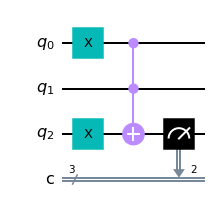

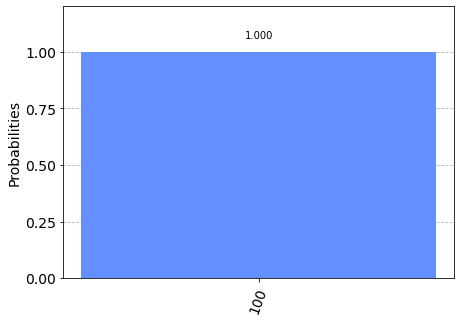

In [18]:
circuit = QuantumCircuit(3,3)
circuit.x(0)
circuit.x(2)
circuit.ccx(0,1,2)
circuit.measure(2,2)
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)

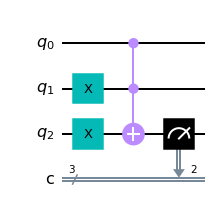

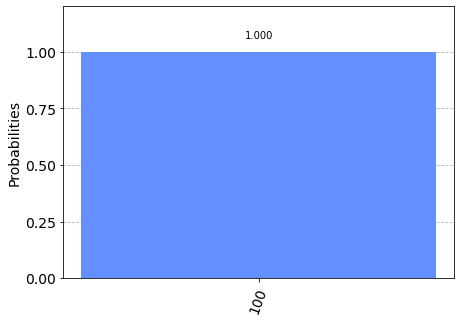

In [19]:
circuit = QuantumCircuit(3,3)
circuit.x(1)
circuit.x(2)
circuit.ccx(0,1,2)
circuit.measure(2,2)
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)

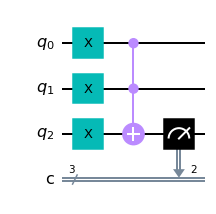

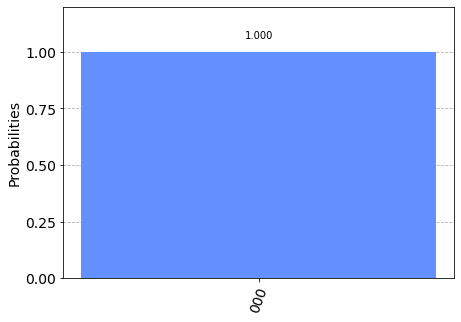

In [20]:
circuit = QuantumCircuit(3,3)
circuit.x(0)
circuit.x(1)
circuit.x(2)
circuit.ccx(0,1,2)
circuit.measure(2,2)
circuit.draw('mpl')

compiled_circuit = transpile(circuit, simulator)
run_circuit_and_plot(compiled_circuit)